In [39]:
# In classification, accuracy is the commonly used metric
# Accuracy = (correct predictions / total observations)

from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("../datasets/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
print(df.shape)

(768, 9)


In [25]:
X = df.iloc[:, :8].values
y = df.iloc[:, 8].values

In [32]:
from sklearn.model_selection import train_test_split
''' 
(random_state = 21) setting the seed to 21 and using the same number again 
lets us produce the same random numbers.

(stratify=y) we want to make sure that the proportion of labels are exactly 
the same in training and testing
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7359307359307359


In [38]:
test_accuracies = []
train_accuracies = []
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    test_accuracies.append(knn.score(X_test, y_test))
    train_accuracies.append(knn.score(X_train, y_train))

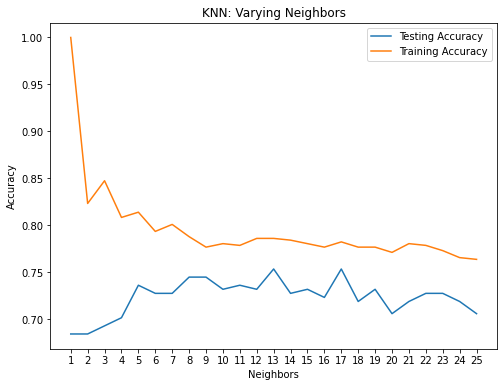

In [45]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Neighbors")
plt.plot(neighbors, test_accuracies, label="Testing Accuracy")
plt.plot(neighbors, train_accuracies, label="Training Accuracy")
plt.xticks(neighbors)
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# From the graph it seems like the best value for K is around 13